# Variational Autoencoder?

A Variational Autoencoder (VAE) is a type of autoencoder that introduces a probabilistic approach to autoencoding. It's a generative model that provides a probabilistic manner for describing an observation in latent space. 

Unlike a traditional autoencoder, which maps the input onto a latent vector, a VAE maps the input data into the parameters of a probability distribution, such as the mean and variance of a Gaussian. This approach produces a continuous, structured latent space, which is useful for using and manipulating the data.

The architecture of a VAE is similar to a traditional autoencoder consisting of an encoder, a decoder, and a loss function. However, the encoder and decoder are connected through a bottleneck layer that imposes a probabilistic constraint, ensuring that the representations in the latent space follow a Gaussian distribution.

The loss function of a VAE consists of two parts: a reconstruction loss that forces the decoded samples to match the initial inputs, and a KL divergence that measures how much the latent variables deviate from the standard normal distribution.

VAEs are widely used for generating new data that resemble the training data, such as generating new images that look like the images in the training set.

# Arcitecture Of  Variational Autoencoder?

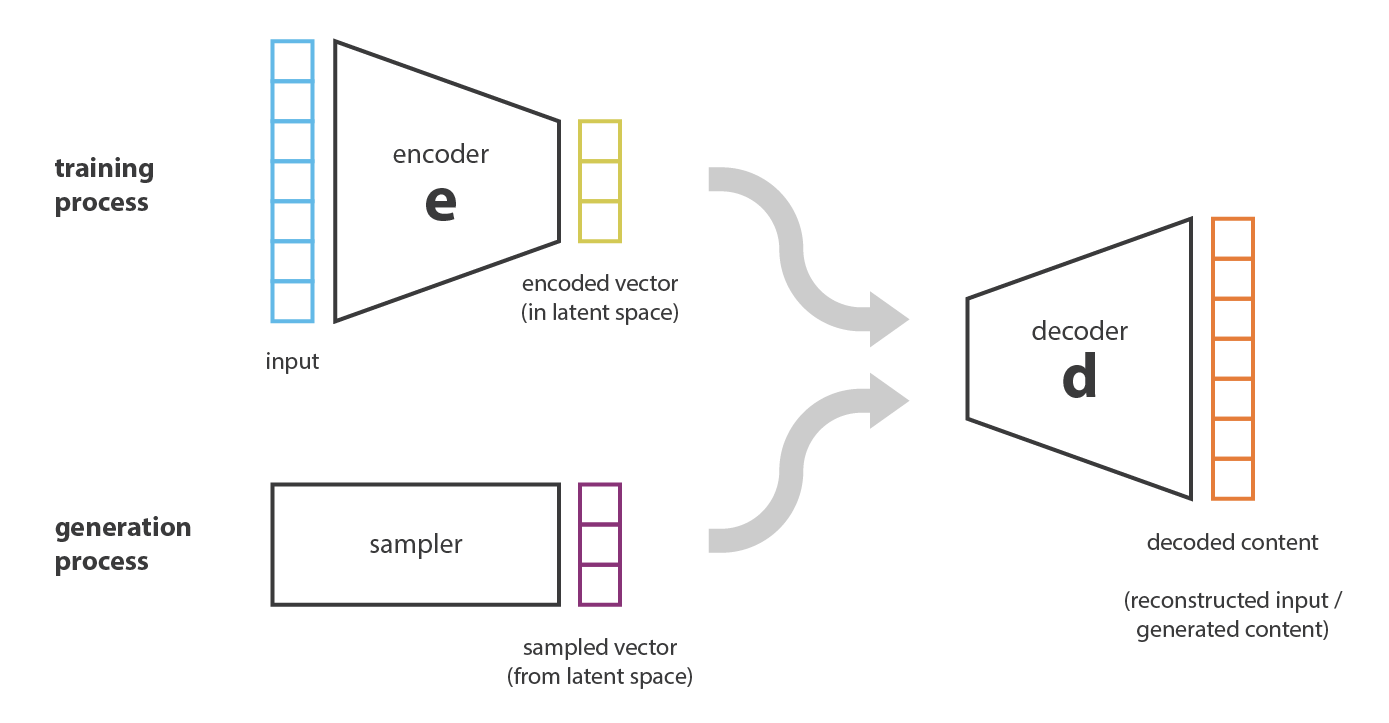

In [1]:
from IPython.display import Image
Image(filename='images/VAs.png')

A Variational Autoencoder (VAE) consists of three main parts: an encoder, a decoder, and a loss function. Here's a brief overview of each part:

1. **Encoder**: The encoder takes the input data and encodes it into a latent space. Unlike a traditional autoencoder, which encodes the input data into a single point in the latent space, the VAE's encoder encodes the input data into a distribution over the latent space. This is typically done by having the encoder output the parameters (mean and standard deviation) of a Gaussian distribution.

2. **Latent Space**: The latent space is where the input data is represented in a compressed, encoded form. In a VAE, each point in the latent space is a potential input for the decoder, not just the points that were produced by the encoder from the training data. This is a key difference between VAEs and traditional autoencoders and is what makes VAEs generative models.

3. **Decoder**: The decoder takes a point in the latent space and decodes it back into the original input space. The goal of the decoder is to reconstruct the original input data as accurately as possible from the encoded representation.

4. **Loss Function**: The loss function for a VAE has two parts. The first part is the reconstruction loss, which measures how well the decoder is able to reconstruct the original input data. The second part is the KL divergence, which measures how much the distribution over the latent space produced by the encoder deviates from a standard Gaussian distribution. The total loss is the sum of these two parts.

The architecture of a VAE ensures that the model is able to generate new data that resembles the training data. By sampling points from the latent space and feeding them into the decoder, we can generate new data that the model has never seen before.

# What are some common techniques for regularizing a Variational Autoencoder?

Regularizing a Variational Autoencoder (VAE) is primarily done through the design of the loss function, which includes a term that forces the latent variables to follow a specific distribution (usually a standard normal distribution). This is known as the KL-divergence regularization. Here are some additional techniques that can be used to regularize a VAE:

1. **Weight Decay**: Similar to other neural networks, weight decay (also known as L2 regularization) can be used in VAEs. This adds a penalty term to the loss function proportional to the sum of the squares of the weights, which helps prevent overfitting.

2. **Early Stopping**: This technique involves stopping the training process once the model's performance on a validation set stops improving. This helps to prevent overfitting by not allowing the model to continue training once it starts to memorize the training data.

3. **Dropout**: Dropout is a technique where randomly selected neurons are ignored during training, which helps prevent overfitting. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

4. **Batch Normalization**: Batch normalization is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling. It can be used in VAEs to help the model generalize better.

5. **Noise Injection**: Noise injection at the input layer is a form of regularization that can help prevent overfitting. This is similar to the concept of denoising autoencoders.

Remember, the choice of regularization techniques depends on the specific problem and dataset. It's often beneficial to experiment with different techniques and combinations to see what works best.

# Python Code Implementation?

Here's a simple implementation of a Variational Autoencoder (VAE) using Keras. This example assumes you're working with images of shape (28, 28, 1), like those in the MNIST dataset.



In [2]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import losses
from keras.datasets import mnist
import numpy as np

# Parameters
original_dim = 28 * 28
latent_dim = 2
intermediate_dim = 256
batch_size = 100
epochs = 50
epsilon_std = 1.0

# Encoder
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling from latent space
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(x, x_decoded_mean)

# Loss
xent_loss = original_dim * losses.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

2023-12-26 23:19:29.741605: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 23:19:30.098558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 23:19:30.101370: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 23:19:32.334461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


2023-12-26 23:19:38.662180: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


600/600 [==============================] - ETA: 0s - loss: 199.2846

2023-12-26 23:19:50.527913: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


600/600 [==============================] - 12s 18ms/step - loss: 199.2846 - val_loss: 173.8256
Epoch 2/50
600/600 [==============================] - 7s 12ms/step - loss: 170.1720 - val_loss: 167.7576
Epoch 3/50
600/600 [==============================] - 8s 13ms/step - loss: 166.2517 - val_loss: 165.2602
Epoch 4/50
600/600 [==============================] - 10s 17ms/step - loss: 164.2175 - val_loss: 163.5845
Epoch 5/50
600/600 [==============================] - 8s 14ms/step - loss: 162.7205 - val_loss: 162.2956
Epoch 6/50
600/600 [==============================] - 8s 14ms/step - loss: 161.4019 - val_loss: 161.1361
Epoch 7/50
600/600 [==============================] - 8s 13ms/step - loss: 160.1901 - val_loss: 160.0190
Epoch 8/50
600/600 [==============================] - 8s 13ms/step - loss: 159.0540 - val_loss: 158.8612
Epoch 9/50
600/600 [==============================] - 8s 13ms/step - loss: 158.0840 - val_loss: 158.2522
Epoch 10/50
600/600 [==============================] - 9s 15ms/s



In this code, `load_and_preprocess_your_image()` should be a function that loads your image and preprocesses it to the format expected by your VAE (for example, normalizing pixel values and reshaping the image). Similarly, `postprocess_image()` should be a function that postprocesses the images to a format that you can use (for example, reshaping them back to their original shape and denormalizing pixel values).

The exact details of these preprocessing and postprocessing steps will depend on your specific VAE architecture and the type of images you're working with. For example, if your VAE was trained on grayscale images with pixel values normalized to the range [0, 1], you might need to denormalize the pixel values of the images to the range [0, 255] and convert them to an integer data type before you can view them.

# How can I evaluate the performance of a Variational Autoencoder?

Evaluating the performance of a Variational Autoencoder (VAE) can be done in several ways, depending on the specific task at hand. Here are a few common methods:

1. **Reconstruction Loss**: This is the most direct way to evaluate a VAE. It measures how well the VAE can reconstruct the input data after encoding it into the latent space and decoding it back. Lower reconstruction loss indicates better performance.

2. **KL Divergence**: This is part of the loss function in VAEs and measures how much the learned distribution in the latent space deviates from a standard normal distribution. Lower KL divergence indicates better performance.

3. **Perplexity**: If you're using a VAE for a generative task, you can measure the perplexity of the model on a held-out test set. Lower perplexity indicates better performance.

4. **Visual Inspection**: For tasks like image generation, visual inspection of the generated samples can be a good way to evaluate the model. You can check if the generated samples look like realistic versions of the input data.

5. **Downstream Tasks**: If the VAE is being used to learn a representation for a downstream task (like classification or regression), you can evaluate the performance of the VAE based on how well it improves the performance on that task.

6. **Interpolation**: VAEs should create a smooth latent space where interpolation between points results in sensible transitions. You can evaluate this by choosing two data points, encoding them into the latent space, generating several intermediate points between them, and decoding these points. The transitions in the decoded data should be smooth and coherent.

Remember, the choice of evaluation metric should align with the specific goal of your model.

# How can I generate new samples using a trained Variational Autoencoder?

Once you have trained a Variational Autoencoder (VAE), you can generate new samples by following these steps:

1. Sample a point from the latent space. If your VAE is designed correctly, this should follow a standard normal distribution. In Python, you can use `np.random.normal()` to generate these samples.

2. Pass this sampled point through the decoder part of the VAE. The output will be a new sample in the data space.

Here's a simple Python code snippet that demonstrates this:



In [4]:
# Assume that `decoder` is your trained decoder model
# and `latent_dim` is the dimension of your latent space

# Sample from the latent space
z_sample = np.random.normal(size=(1, latent_dim))

# Decode the sample to get a new data point
new_sample = vae.predict(z_sample)



In this code, `new_sample` will be a new data point generated by the VAE. The shape and type of `new_sample` will depend on your specific VAE architecture and the type of data you're working with. For example, if you're working with images, you might need to reshape `new_sample` and convert it to an image format before you can view it.

# How can I perform image reconstruction using a trained Variational Autoencoder?

Once you have a trained Variational Autoencoder (VAE), you can perform image reconstruction by passing an image through the encoder to get the latent representation, and then passing this representation through the decoder to get the reconstructed image. Here's a simple Python code snippet that demonstrates this:



In [ ]:
# Assume that `vae` is your trained VAE model

# Load your image (normalized and reshaped if necessary)
image = load_and_preprocess_your_image()

# Use the VAE to reconstruct the image
reconstructed_image = vae.predict(image)

# Postprocess the reconstructed image if necessary
reconstructed_image = postprocess_reconstructed_image(reconstructed_image)



In this code, `load_and_preprocess_your_image()` should be a function that loads your image and preprocesses it to the format expected by your VAE (for example, normalizing pixel values and reshaping the image). Similarly, `postprocess_reconstructed_image()` should be a function that postprocesses the reconstructed image to a format that you can use (for example, reshaping it back to its original shape and denormalizing pixel values).

The exact details of these preprocessing and postprocessing steps will depend on your specific VAE architecture and the type of images you're working with.

# Application?

Variational Autoencoders (VAEs) are widely used in various applications due to their generative capabilities and the structured latent space they learn. Here are a few applications:

1. **Image Generation**: VAEs can generate new images that resemble the training data. This can be used to generate realistic-looking images of faces, handwriting, etc.

2. **Anomaly Detection**: VAEs can be used to detect anomalies in data. If a data point is not well-reconstructed, it can be considered an anomaly.

3. **Data Denoising**: VAEs can be used to remove noise from data. The VAE learns to reconstruct the original noise-free data, effectively denoising it.

4. **Image Editing**: By manipulating the latent space, VAEs can be used to edit images in a meaningful way. For example, adding the "smiling" vector in the latent space to the encoding of a non-smiling face results in a smiling face when decoded.

5. **Drug Discovery**: VAEs can be used to generate novel chemical structures for potential new drugs.

6. **Recommendation Systems**: VAEs can be used to build recommendation systems. The latent space can capture the underlying factors that explain the observed user-item interactions.

7. **Super-Resolution**: VAEs can be used to generate high-resolution versions of low-resolution inputs.

8. **Text Generation**: Although more challenging due to the discrete nature of text, VAEs can be used for generating realistic text.

Remember, the success of these applications depends on the quality of the VAE and the data it was trained on.